In [2]:
import pandas as pd
import numpy as np

In [4]:
#load data into memory
data=pd.read_csv("data.csv")
print(data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [13]:
#convert data into matrix
data=np.array(data)
print(f"total shape:{data.shape}")
#dataset has 42000 images, each of resolution 28*28 pixels (784 flattened pixels per image)
#flattening: take a matrix and convert it to a vector
#datasets of images are always flattened
#each image is labelled (the label says which number is rapresented), so we have 785 columns in total
#we're gonna split the data intto a matrix X and a vector Y, where:
#X is of dimension (42000, 784) -> just images
#Y is of dimension (42000, ) -> just label [first column of the 785]
X=data[:,1:].T #slicind is a light computational way to split data
Y=data[:,0]
print(f"Y shape: {Y.shape}")
print(f"X shape: {X.shape}")

d,N=X.shape

total shape:(42000, 785)
Y shape: (42000,)
X shape: (784, 42000)


label: 8


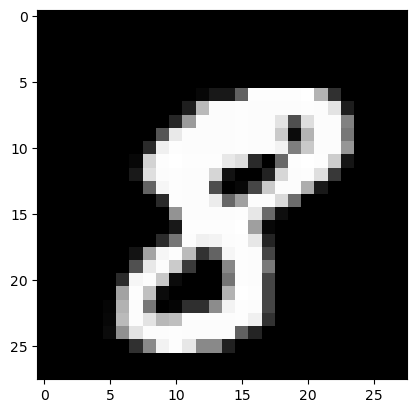

In [19]:
#how to visualize images in python?
import matplotlib.pyplot as plt
#load an image in memory
idx=10 #tenth image
img=X[:,idx] #we take all the rows of the 10th column (flattened matrix)
#recreate matrix from the flattened vector
img=np.reshape(img, (28,28))
#visualize image with matplotlib
print(f"label: {Y[idx]}")
plt.imshow(img, cmap="gray")#cmap says which encoding is used to rapresent images
plt.show()


In [46]:
#create a function
#takes in input a dataset X and an integer Ntrain, that returns 2 datasets (Xtrain, Xtest)
#where Xtrain has Ntrain random samples from X
#Xtest has the rest of the dataset

def splitDataset(X, Y, Ntrain):
    d,N=X.shape
    X=X.T
    idx=np.arange(N)
    np.random.shuffle(idx)
    Ntest=N-Ntrain

    Xtrain=np.zeros((Ntrain,784))
    Ytrain=np.zeros((Ntrain))
    Xtest=np.zeros((Ntest,784))
    Ytest=np.zeros((Ntest))

    for i in range(Ntrain):
        Xtrain[i]=X[idx[i]]
        Ytrain[i]=Y[idx[i]]
        
    j=0
    for i in range(Ntrain, N):
        Xtest[j]=X[idx[i]]
        Ytest[j]=Y[idx[i]]
        j+=1

    return (Xtrain, Xtest), (Ytrain, Ytest)

(Xtrain, Xtest), (Ytrain, Ytest)=(splitDataset(X, Y, 30000))
print(Xtrain.shape, Xtest.shape)

(30000, 784) (12000, 784)


In [ ]:
#SVD of a matrix A:
#U, s, V= np.linalg.svd(A)
#use only the training data Xtrain
#write a function that takes as input a matrix X and an integer k and returns Z=Uk.T*X, the PCA of X
def PCA(X, k):
    #calculate centroid Xc
    c=np.mean(X, axis=1)
    Xc=X-c.reshape(d,1)
    
    


        